# Telcom Churn Analysis

In [1]:
#
##### Business understanding #####
#
# 1. What is the overall Churn Percentage ?
# 2. Which gender category has more churn rate?
# 3. Which Internet service users has more churn percentage?
# 4. Is high monthly charge leads to high churn ?
# 5. What is the survival curve/probability for the given customer?



In [2]:
#Import Libraries
import pandas as pd
import numpy as np, array
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline



In [3]:
# Data is imported from Kaggle
#     https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

In [4]:
#Read CSV files

df = pd.read_csv("telco_churn.csv")

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
#Data Overview
print("No of Rows:",df.shape[0])
print ("No of Columns:",df.shape[1])
print ("\nColumns:\n",df.columns.tolist())


No of Rows: 7043
No of Columns: 21

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Data Preparation

In [7]:
#checking for Missing Values
print ("\nMissingvalues: \n",df.isnull().any())
print("Missing value in any column : {}".format(df.isnull().values.any()))


Missingvalues: 
 customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool
Missing value in any column : False


In [8]:
#unique values in each column
print ("\nUnique values:\n",df.nunique())


Unique values:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [9]:
#Drops ID column because its not needed 
df.drop(['customerID'], axis=1, inplace=True)

# Totalcharges should be in numberic
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

#replacing (yes , no) to ( 1, 0 )
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

# What is the overall Churn Percentage ?

In [10]:
# Churn
print ("Churn:\n",df['Churn'].value_counts())

Churn:
 0    5174
1    1869
Name: Churn, dtype: int64


/Users/santhosh/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


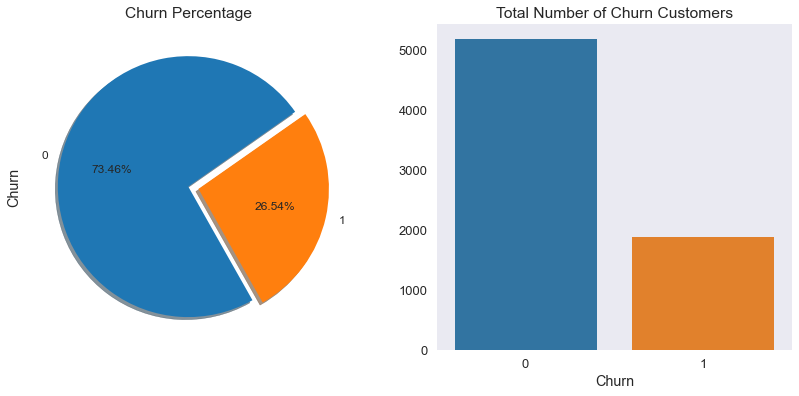

In [11]:
#Visualize the Churn numbers
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(14,6))

df['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=12, startangle=35 )
ax[0].set_title('Churn Percentage')

sns.countplot('Churn', data=df, ax=ax[1])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Which gender category has more churn rate?

In [13]:
# Churn Rate by Gender
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

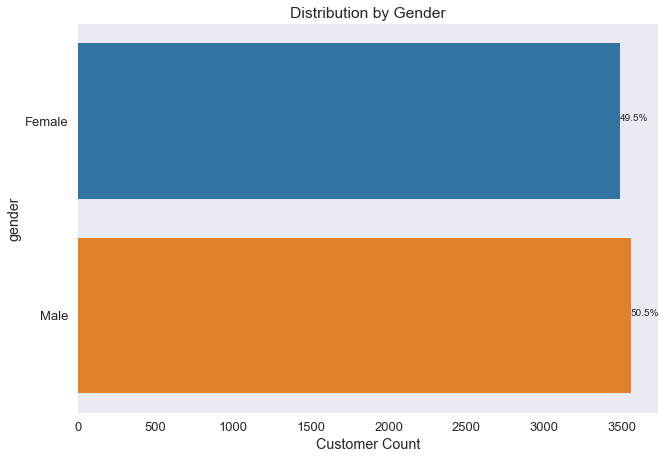

In [14]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution by Gender')
    plt.xlabel('Customer Count')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "gender")
# ax.set_ylabel('# of Customers')
# ax.set_title('# of Customers by gender')

In [15]:
# # Churn Rate by Gender
# display(df.groupby('gender')['Churn'].value_counts())
# df.groupby(['gender','Churn']).size().unstack(fill_value=0).plot.bar()


In [16]:
def plot_Bars_Splitted(a,b="Churn"):
    df_g = df.groupby([a, b]).size().reset_index()
    df_g['percentage'] = df.groupby([a, b]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
    df_g.columns = [a, b, 'Counts', 'Percentage']

    fig = px.bar(df_g, x=a, y=['Counts'], color=b, title = a, text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
    fig.show()
plot_Bars_Splitted('gender')

# Customer churn by service information

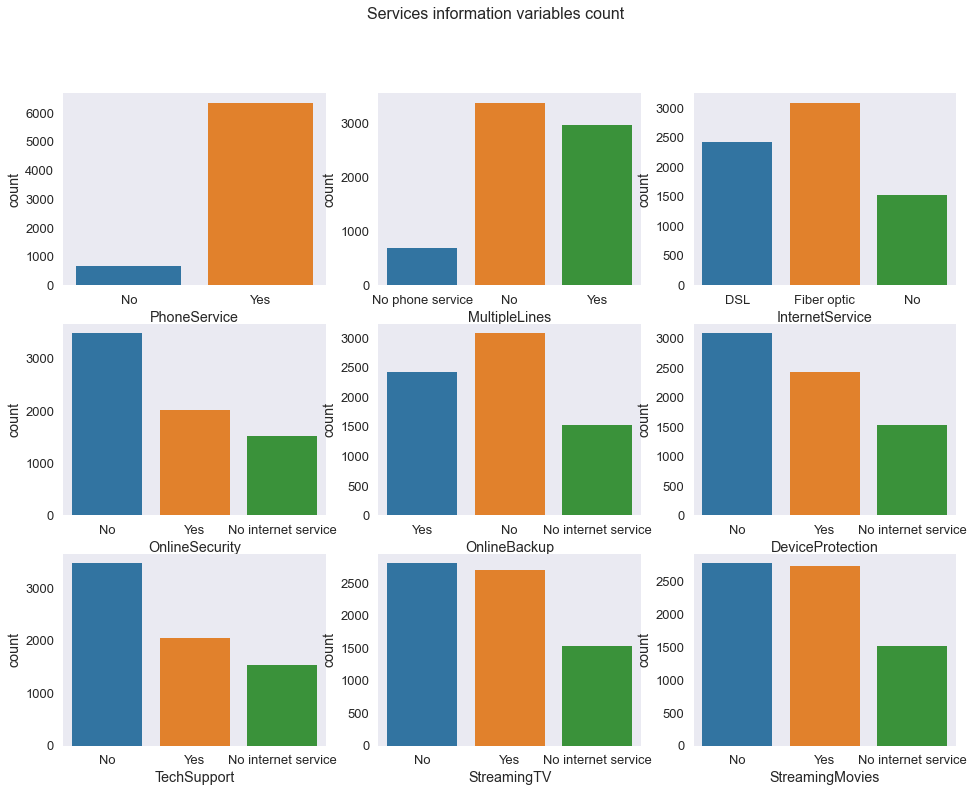

In [17]:
#general distribution

data = df
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
sns.countplot(data=data, x="PhoneService", ax=axs[0,0])
sns.countplot(data=data, x="MultipleLines", ax=axs[0,1])
sns.countplot(data=data, x="InternetService", ax=axs[0,2])
sns.countplot(data=data, x="OnlineSecurity", ax=axs[1,0])
sns.countplot(data=data, x="OnlineBackup", ax=axs[1,1])
sns.countplot(data=data, x="DeviceProtection", ax=axs[1,2])
sns.countplot(data=data, x="TechSupport", ax=axs[2,0])
sns.countplot(data=data, x="StreamingTV", ax=axs[2,1])
sns.countplot(data=data, x="StreamingMovies", ax=axs[2,2])
fig.suptitle('Services information variables count', fontsize=16)
plt.show()

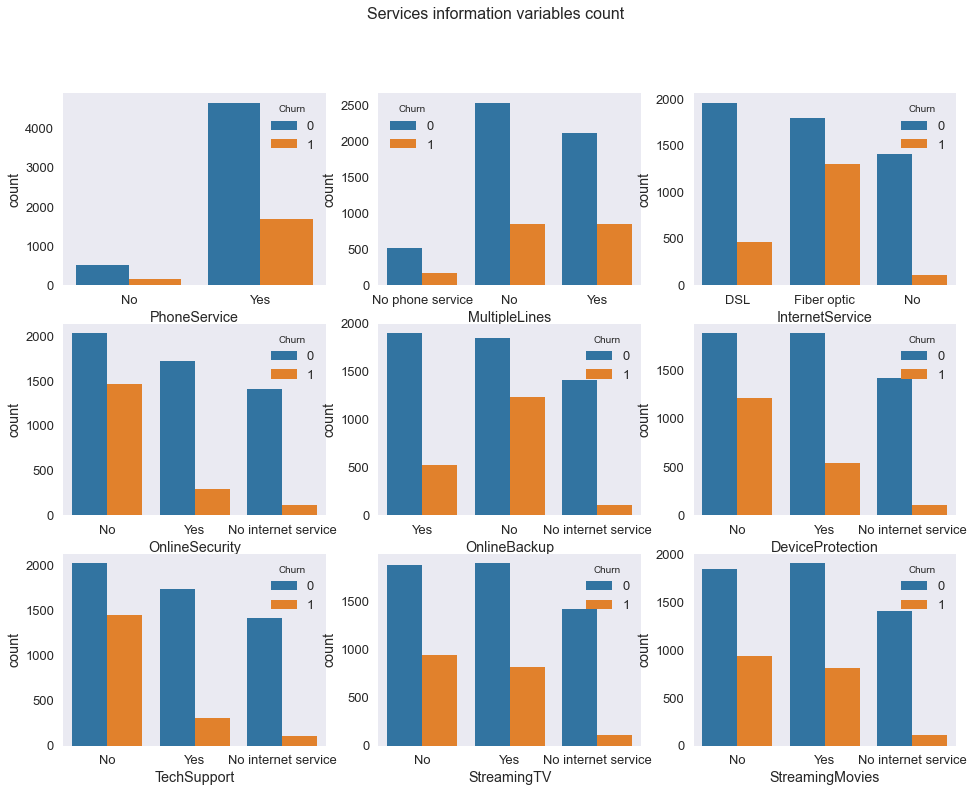

In [18]:
#Churn distribution by service
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
sns.countplot(data=data, x="PhoneService", ax=axs[0,0], hue=data.Churn)
sns.countplot(data=data, x="MultipleLines", ax=axs[0,1], hue=data.Churn)
sns.countplot(data=data, x="InternetService", ax=axs[0,2], hue=data.Churn)
sns.countplot(data=data, x="OnlineSecurity", ax=axs[1,0], hue=data.Churn)
sns.countplot(data=data, x="OnlineBackup", ax=axs[1,1], hue=data.Churn)
sns.countplot(data=data, x="DeviceProtection", ax=axs[1,2], hue=data.Churn)
sns.countplot(data=data, x="TechSupport", ax=axs[2,0], hue=data.Churn)
sns.countplot(data=data, x="StreamingTV", ax=axs[2,1], hue=data.Churn)
sns.countplot(data=data, x="StreamingMovies", ax=axs[2,2], hue=data.Churn)
fig.suptitle('Services information variables count', fontsize=16)
plt.show()

# Which Internet service has more churn?

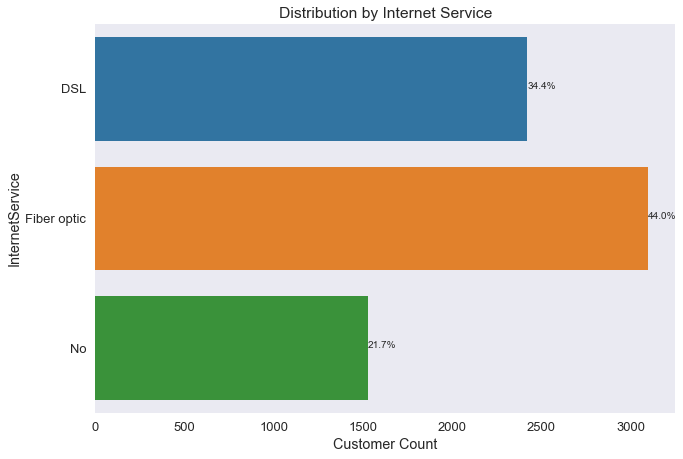

In [19]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution by Internet Service')
    plt.xlabel('Customer Count')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "InternetService")
# ax.set_ylabel('# of Customers')

In [20]:
def plot_Bars_Splitted(a,b="Churn"):
    df_g = df.groupby([a, b]).size().reset_index()
    df_g['percentage'] = df.groupby([a, b]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
    df_g.columns = [a, b, 'Counts', 'Percentage']

    fig = px.bar(df_g, x=a, y=['Counts'], color=b, title = a, text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
    fig.show()
plot_Bars_Splitted('InternetService')

# Is high monthly charge leads to high churn ?

Text(0.5, 1.0, 'Distribution of Churn by Monthly Charges')

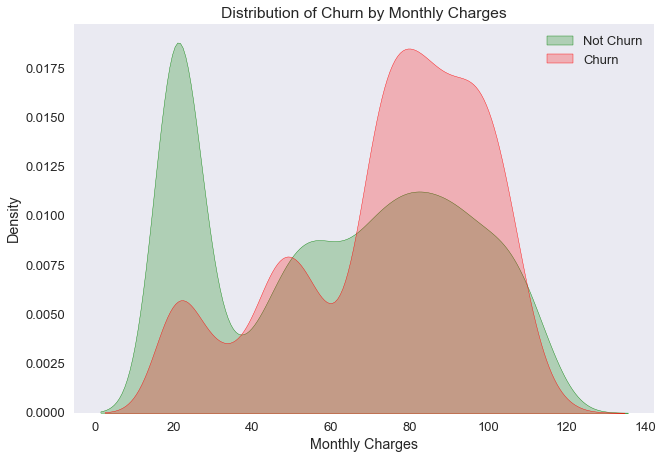

In [21]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Green", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Churn by Monthly Charges')

# What is Customer Survival Curve/Rate ?

<AxesSubplot:xlabel='timeline'>

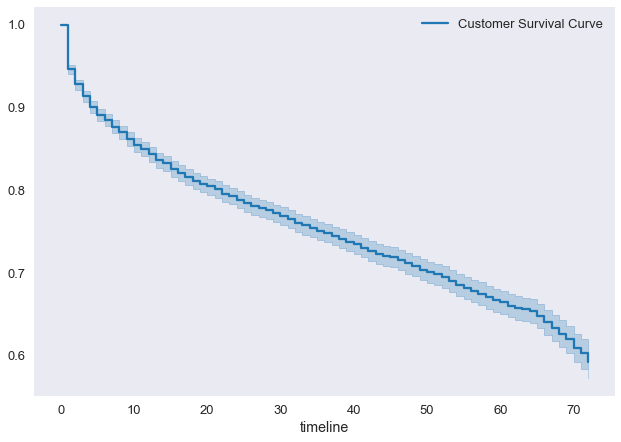

In [22]:
from lifelines import KaplanMeierFitter

# customer tenure
duration = df['tenure']

#cust churned 1 and censored 0
event = df['Churn']

kmf = KaplanMeierFitter()

kmf.fit(duration, event, label = "Customer Survival Curve")

kmf.plot()

<AxesSubplot:>

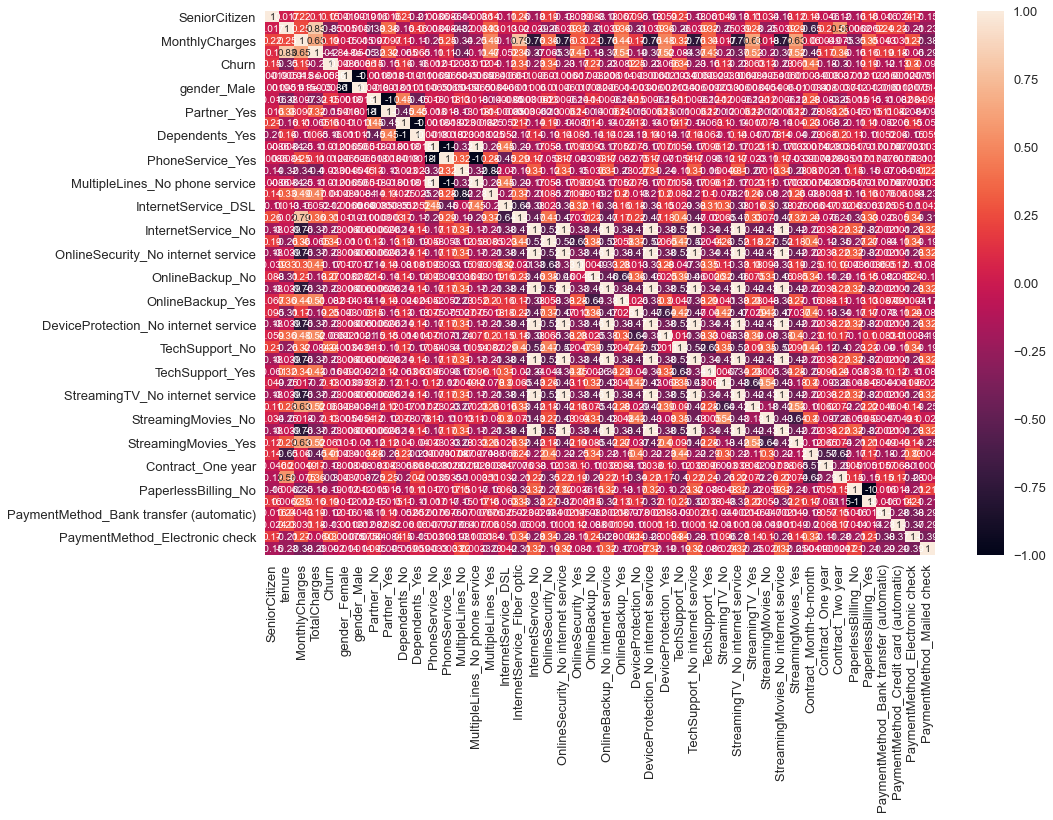

In [23]:
plt.figure(figsize=(15, 10))

df_corr = pd.get_dummies(df)
sns.heatmap(df_corr.corr(), annot=True)

In [24]:

matrix_corr = df_corr.corr()
coef = matrix_corr['Churn'].sort_values(ascending=False)
#Possitively correleated values
possitive_corr = coef[coef>0]

print("Possitive Correlated Features:\n",possitive_corr)
print("\n")
#Negatively correlated values
negative_corr = coef[coef<0]
print("Negative Correlated Features:\n",negative_corr)

Possitive Correlated Features:
 Churn                             1.000000
Contract_Month-to-month           0.405103
OnlineSecurity_No                 0.342637
TechSupport_No                    0.337281
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
OnlineBackup_No                   0.268005
DeviceProtection_No               0.252481
MonthlyCharges                    0.193356
PaperlessBilling_Yes              0.191825
Dependents_No                     0.164221
SeniorCitizen                     0.150889
Partner_No                        0.150448
StreamingMovies_No                0.130845
StreamingTV_No                    0.128916
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
PhoneService_Yes                  0.011942
gender_Female                     0.008612
Name: Churn, dtype: float64


Negative Correlated Features:
 gender_Male                               -0.00

## Conclusion:

1. What is the overall Churn Percentage ?
     Data set has 73.46% Churn and 26.54% No Churn

2. Which gender category has more churn rate?
    
    There is a slight difference in data distribution for male and female.
    Male : 50.5%
        Churn Percentage : 26.16%
    Female : 49.5%
        Churn Percentage : 26.92%
        
    Given data shows that churn is not relative to churn but Female category has slighlty higher churn rate.
    
3. Which Internet service has more churn percentage?
    Telecom service is based on the internet service.
    Data has 3 different type of internet services.
   
    It looks like that Fiber Optic has more distribution and also churn % more for the same service.

4. Is high monthly charge leads to high churn ?
    
    Higher % of customers churn when the monthly charges are high.
    
5. What is the survival curve/probability for the given customer??
    
    Survival curve shows that more than 65% of customers surviving upto 6 years of service. 
    
    
We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable.

High monthly charges and fibre optic internet services leads to high rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.

This analysis is not enough to decide what is right and what is wrong, we need to explore more to better understand.


Medium Post :  https://santhoshrathode.medium.com/telecom-churn-analysis-338b5ef5320d

